In [20]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 7/Machine_Learning/Data set/housing.csv')
df["is_Verified"] = "True"
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,is_Verified
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,True


In [21]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [22]:
df.dropna(inplace=True)

<Axes: xlabel='latitude', ylabel='longitude'>

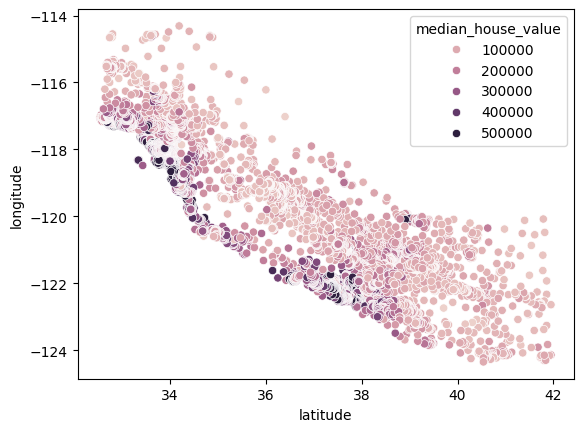

In [23]:
sns.scatterplot(x="latitude", y= "longitude", data=df, hue="median_house_value")

<Axes: xlabel='latitude', ylabel='longitude'>

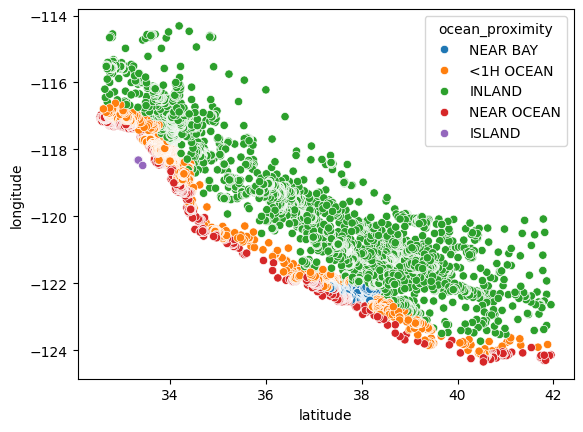

In [24]:
sns.scatterplot(x="latitude", y= "longitude", data=df, hue="ocean_proximity")

<Axes: xlabel='latitude', ylabel='longitude'>

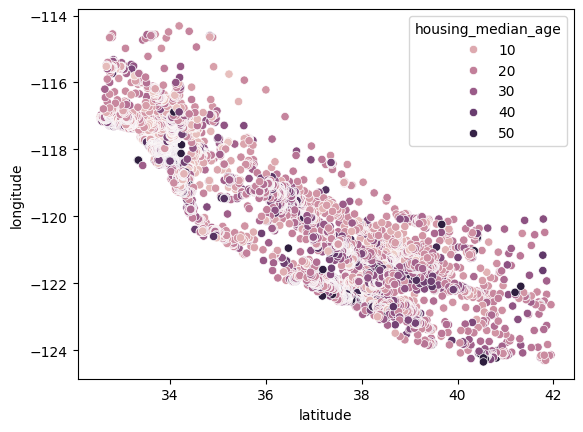

In [25]:
sns.scatterplot(x="latitude", y= "longitude", data=df, hue="housing_median_age")

<Axes: ylabel='median_house_value'>

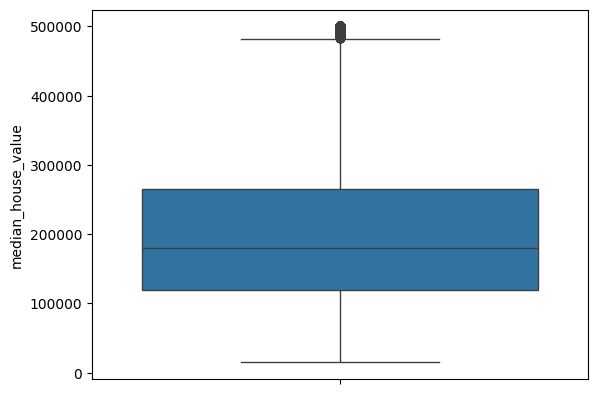

In [26]:
sns.boxplot(y="median_house_value", data=df)

<Axes: ylabel='median_house_value'>

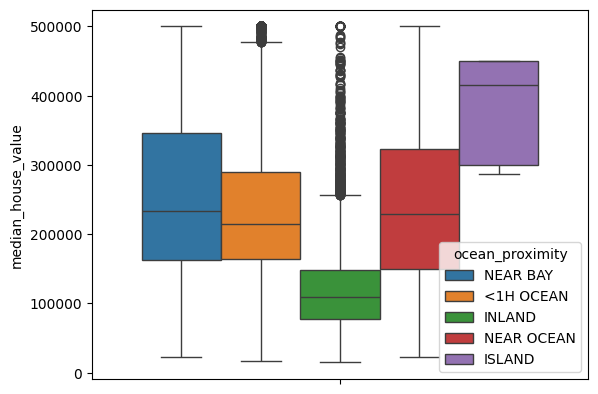

In [27]:
sns.boxplot(y="median_house_value", data=df, hue = "ocean_proximity")

<Axes: >

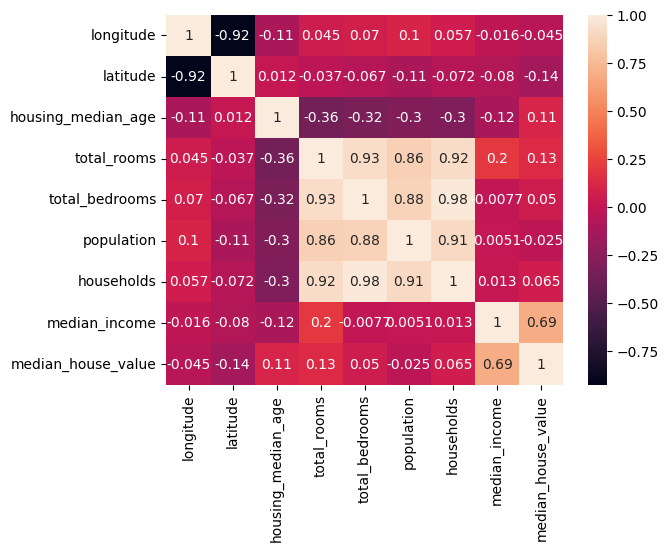

In [28]:
# categórico y numérico separarlos
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)

In [35]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
corr_data = df[numerical_features].corr()
df["interact_latlon"] = df["latitude"] * df["longitude"]
corr_data.drop(["latitude"],axis=1,inplace=True)
corr_data.drop(["longitude"],axis=1,inplace=True)
corr_data.drop(["median_house_value"],axis=1,inplace=True)
corr_data.drop(['total_bedrooms'], axis=1, inplace=True)
corr_data.drop(['population'], axis=1, inplace=True)
corr_data.drop(['households'], axis=1, inplace=True)
corr_matrix = corr_data.corr()
corr_matrix

,housing_median_age,total_rooms,median_income,interact_latlon
housing_median_age,1.000000,-0.785390,-0.124419,-0.105486
total_rooms,-0.785390,1.000000,-0.063178,-0.038490
median_income,-0.124419,-0.063178,1.000000,0.016227
interact_latlon,-0.105486,-0.038490,0.016227,1.000000


In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
datos = sm.add_constant(corr_data)

vif_data = pd.DataFrame()
vif_data["feature"] = datos.columns
vif_data["VIF"] = [variance_inflation_factor(datos.values, i) for i in range(datos.shape[1])]
vif_data

,feature,VIF
0,const,3.215339
1,housing_median_age,2.985503
2,total_rooms,2.923088
3,median_income,1.093436
4,interact_latlon,1.054907


In [37]:
#corr_matrix = df.drop(columns=["sales"]).corr()
umbral = 0.7

pares_correlacionados = []

for i in range(len(corr_matrix)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > umbral:
            pares_correlacionados.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
for par in pares_correlacionados:
    print(f"Alta correlación entre {par[0]} y {par[1]}: {par[2]}")

Alta correlación entre total_rooms y housing_median_age: -0.7853898000635856


In [38]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [33]:
df['is_Verified'].value_counts()

,count
is_Verified,
True,20433


In [40]:
df_modelo = df[["housing_median_age","total_rooms","interact_latlon","median_income","ocean_proximity","median_house_value"]]
df_modelo.head()

,housing_median_age,total_rooms,interact_latlon,median_income,ocean_proximity,median_house_value
0,41.0,880.0,-4630.0724,8.3252,NEAR BAY,452600.0
1,21.0,7099.0,-4627.2492,8.3014,NEAR BAY,358500.0
2,52.0,1467.0,-4626.7840,7.2574,NEAR BAY,352100.0
3,52.0,1274.0,-4627.1625,5.6431,NEAR BAY,341300.0
4,52.0,1627.0,-4627.1625,3.8462,NEAR BAY,342200.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = df.drop("median_house_value",axis = 1)
y = df["median_house_value"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.70, random_state=42)

In [45]:
df_modelo.columns

Index(['housing_median_age', 'total_rooms', 'interact_latlon', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [46]:
#Dividimos en categorías
numerical_features = ['housing_median_age', 'total_rooms', 'median_income', 'interact_latlon']
categorical_features = ['ocean_proximity']

In [47]:
numercial_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [48]:
# Pre-proesador
prepeocesador = ColumnTransformer(
    transformers =[
        ("num",numercial_transformer,numerical_features),
        ("cat",categorical_transformer,categorical_features)
    ]
    )

model = Pipeline(
    steps = [
        ("preprocesor",prepeocesador),
        ("regresor",LinearRegression())

    ]
)
model.fit(X_train,y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'interact_latlon']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('regresor', LinearRegression())])

In [49]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [50]:
print(f"""
METRICAS
MSE: {mse}
RMSE: {rmse}
R2: {r2}
""")


METRICAS
MSE: 5273781792.246989
RMSE: 72620.80825938933
R2: 0.6043951301277694



In [ ]:
f